##  Example of using the library

There are two options for using the library:

1) having a data and minimum support value, create a Trie of rules with authomaticly generated association rrules using popular library(mlxtend: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

2) having original data, create a Trie of rules with previosly mined association rules(or frequent sequences). The association rules set should be presented as a list of items in a rule.

Both approaches are provided below.


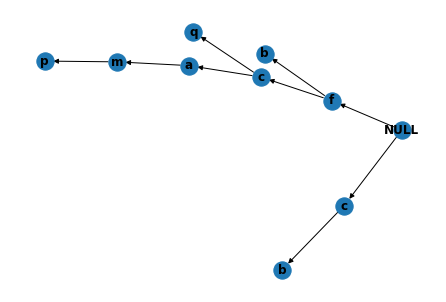

In [10]:
from trieofrules import trieofrules

#original dataset
data = [
        ['f','c','a','m','p','q'],
        ['f','c','a','b','m'],
        ['f','b','e'],
        ['c','b','p'],
        ['f','c','a','m','p'] ]

#association rules for visualisation presented as a list of frequent sequences
rules = [['f','c','a','m','p'],
        ['f','b'],
        ['c','b'],
        ['f','c','q']
        ]

#1st approcah using only data
TOR = trieofrules(data = data, min_support = 0.3, alg='FP-max' ) #supported algorithms: FP-max, FP-growth, Apriori

#2nd approach using data and pre-mined frequent sequences
TOR_premined = trieofrules(data = data, alg = 'Apriori', frequent_sequences = rules)

#draw trie of rules without metics
TOR_premined.draw()

#save as a grpah file. Supprted formats: gexf, gml, graphml
TOR.save_graph(filename = 'Trie of rules example.gml',fileformat = 'gml')
 